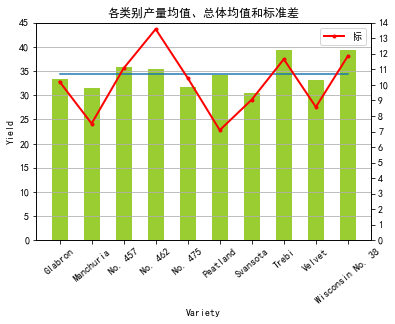

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data = pd.read_csv('./barley2.csv')
# 设置中文显示
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False

# 取出试验点名、种类名
sites = data.Site.unique()
varieties = data.Variety.unique()

# 计算各种类平均值、总体平均值、各种类标准差
# 种类平均值
varieties_mean = data.groupby('Variety')['Yield'].mean()
all_mean = data.Yield.mean()
varieties_standard_deviation = data.groupby('Variety')['Yield'].std()
# 绘图

fig,ax1 = plt.subplots()
# 均值
plt.plot(varieties, [all_mean for i in range(len(varieties))])
plt.title('各类别产量均值、总体均值和标准差')
# 种类均值
plt.bar(varieties, varieties_mean, facecolor='yellowgreen', width=0.5)
plt.grid(axis='y')
plt.xlabel('Variety')
plt.ylabel('Yield')
plt.xticks(rotation=40)
plt.yticks(range(0,50,5))

# 标准差
ax2 = ax1.twinx()
plt.plot(varieties, varieties_standard_deviation,'.-', lw=2, color='r')
plt.yticks(range(7,15))
plt.legend('标准差', loc = 'best')
plt.yticks(range(0,15))
plt.rcParams['figure.figsize'] = (10.0, 4.0) # 设置figure_size尺寸
#plt.tight_layout()
plt.savefig('./整体分析aaa.jpg', dpi=100)
plt.show()

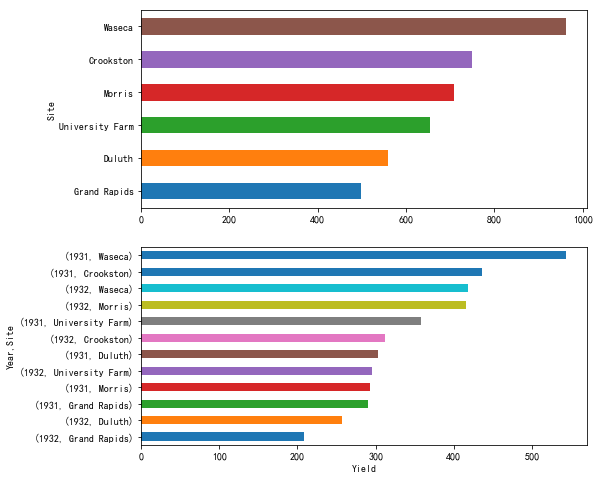

In [3]:
'''按地区分析'''
fig, axes = plt.subplots(2,1)

# 按地区绘制总产量
data.groupby(['Site'])['Yield'].sum().sort_values().plot(kind='barh', figsize=(8,4), ax=axes[0])
# 按地区、年份绘制总产量
data.groupby(['Year', 'Site'])['Yield'].sum().sort_values().plot(kind='barh', figsize=(8,8), ax=axes[1])
plt.xlabel('Yield')
plt.savefig('各实验站每年总产量.jpg')
plt.show()

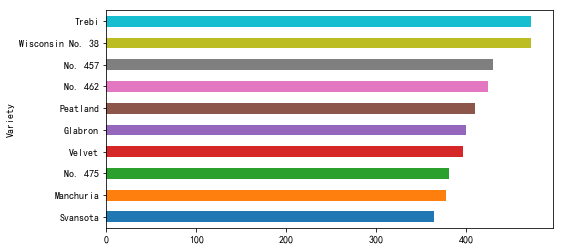

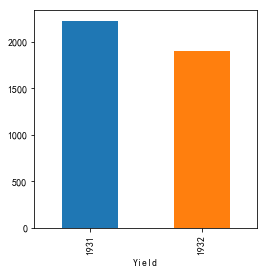

In [4]:
'''按大麦类别'''
# 不按年份分组
data.groupby('Variety')['Yield'].sum().sort_values().plot(kind='barh', figsize=(8,4))
plt.savefig('各种类大麦总产量.jpg')
plt.show()
# 按年份分组
data.groupby( 'Year')['Yield'].sum().plot(kind='bar', figsize=(4,4))
plt.xlabel('Yield')
plt.savefig('各年份总产量.jpg')
plt.show()

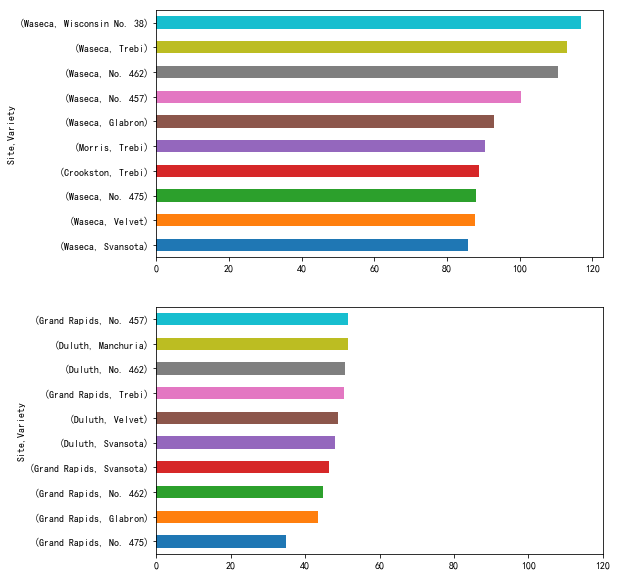

In [5]:
'''按地区和大麦种类'''
fig, axes = plt.subplots(2,1)
data.groupby(['Site','Variety'])['Yield'].sum().sort_values(ascending=False).head(10).sort_values().plot(kind='barh', figsize=(8,10), ax=axes[0])
data.groupby(['Site','Variety'])['Yield'].sum().sort_values().head(10).sort_values().plot(kind='barh', figsize=(8,10), ax=axes[1])
plt.xticks(range(0,121,20))
plt.savefig('产量最高的地区种类和产量最低的地区种类.jpg')
plt.show()

Site             Variety           Year
Crookston        Glabron           1931    38.13333
                                   1932    26.16667
                 Manchuria         1931    39.93333
                                   1932    32.96667
                 No. 457           1931    45.66667
                                   1932    34.33333
                 No. 462           1931    48.56666
                                   1932    30.53333
                 No. 475           1931    44.10000
                                   1932    32.13333
                 Peatland          1931    41.60000
                                   1932    25.23333
                 Svansota          1931    40.46667
                                   1932    20.63333
                 Trebi             1931    46.93333
                                   1932    41.83333
                 Velvet            1931    41.33333
                                   1932    32.06666
                 Wiscons

AttributeError: module 'matplotlib.pyplot' has no attribute 'labels'

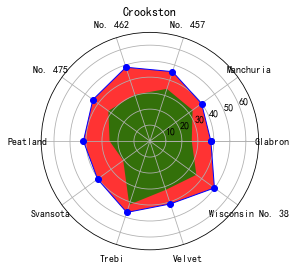

In [16]:
'''绘制各个地区关于每个大麦种类产量的雷达图'''
# 创建保存图片的目录
import os
path = os.path.abspath(os.curdir) + '\\radar'
if os.path.exists(path) == False:
    os.mkdir(path)

# 分组求和
data_series = data.groupby(['Site','Variety', 'Year'])['Yield'].sum()

print(data_series)

labels = np.array(varieties) # 标签
dataLenth = len(labels)  # 数据长度

# 雷达图绘制
def radar_chart(data1, data2, i):
    # 1931年
    data_radar1 = np.array(data1) # 数据
    angles1 = np.linspace(0, 2*np.pi, dataLenth, endpoint=False)  # 分割圆周长
    data_radar1 = np.concatenate((data_radar1, [data_radar1[0]]))  # 闭合
    angles1 = np.concatenate((angles1, [angles1[0]]))  # 闭合
    # 1932年
    data_radar2 = np.array(data2) # 数据
    angles2 = np.linspace(0, 2*np.pi, dataLenth, endpoint=False)  # 分割圆周长
    data_radar2 = np.concatenate((data_radar2, [data_radar2[0]]))  # 闭合
    angles2 = np.concatenate((angles2, [angles2[0]]))  # 闭合
    
    plt.polar(angles1, data_radar1, 'bo-', linewidth=1)  # 做极坐标系
    plt.fill(angles1, data_radar1, facecolor='r', alpha=0.8)# 填充
    
    plt.fill(angles2, data_radar2, facecolor='g', alpha=0.8)# 填充
    
    plt.thetagrids(angles1 * 180/np.pi, labels)  # 做标签
    plt.ylim(0, 68)
    plt.title(sites[i])
    plt.labels(['1931', '1932'])
    plt.savefig('./radar/'+sites[i]+'.jpg')
    plt.show()

data1 = data_series[0*10:(0+2)*10: 2]
data2 = data_series[0*10+1:(0+2)*10: 2]
    
radar_chart(data1, data2, 0)
print(data1, data2)
"""
# 遍历绘制六个地区
for i in range(len(sites)):
    radar_chart(data_series[i*10:(i+1)*10], i)
"""

In [27]:









# 计算各地区产量的四分位数，划分级别
sort_data = data.groupby(['Site','Variety'])['Yield'].sum()









for i in range(len(sites)):
    # 获取数据
    site_data = sort_data[i*10:(i+1)*10].sort_values()
    # 四分位数
    upper_quarter = np.percentile(site_data, 75)
    lower_quarter = np.percentile(site_data, 25)
    # 打印
    print(site_data)
    print(upper_quarter, lower_quarter)
    # 极值标准化
    data_min = site_data.min()
    data_max = site_data.max()
    pd.set_option('precision', 2)
    print(((site_data-data_min)/(data_max-data_min)).sort_values())
    print('='*40)


Site       Variety         
Crookston  Svansota            61.10000
           Glabron             64.30000
           Peatland            66.83333
           Manchuria           72.90000
           Velvet              73.39999
           No. 475             76.23333
           No. 462             79.09999
           No. 457             80.00000
           Wisconsin No. 38    85.76667
           Trebi               88.76666
Name: Yield, dtype: float64
79.7749975 68.3499975
Site       Variety         
Crookston  Svansota            0.00
           Glabron             0.12
           Peatland            0.21
           Manchuria           0.43
           Velvet              0.44
           No. 475             0.55
           No. 462             0.65
           No. 457             0.68
           Wisconsin No. 38    0.89
           Trebi               1.00
Name: Yield, dtype: float64
Site    Variety         
Duluth  Svansota            47.93
        Velvet              48.77
        No. 4